# Bank Customer Churn Prediction

This notebook implements a machine learning pipeline to predict customer churn in banking.

In [18]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

## 1. Data Loading and Exploration

In [19]:
# Load the dataset
df = pd.read_csv('BankChurners.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [20]:
# Basic data information
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                            

## 2. Exploratory Data Analysis

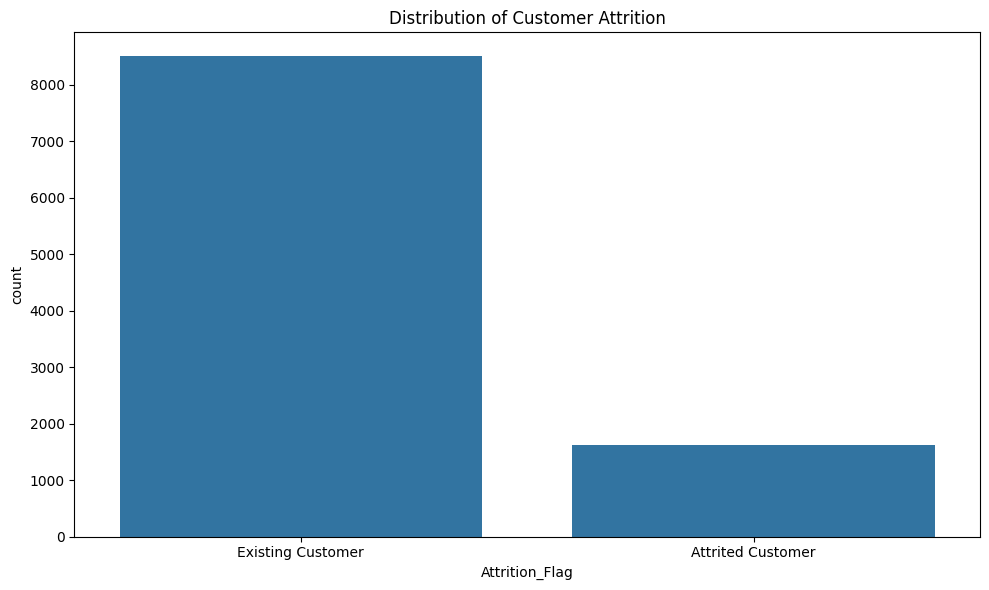

In [21]:
# Create visualizations directory
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

# Plot distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition_Flag')
plt.title('Distribution of Customer Attrition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('visualizations/attrition_distribution.png')
plt.show()

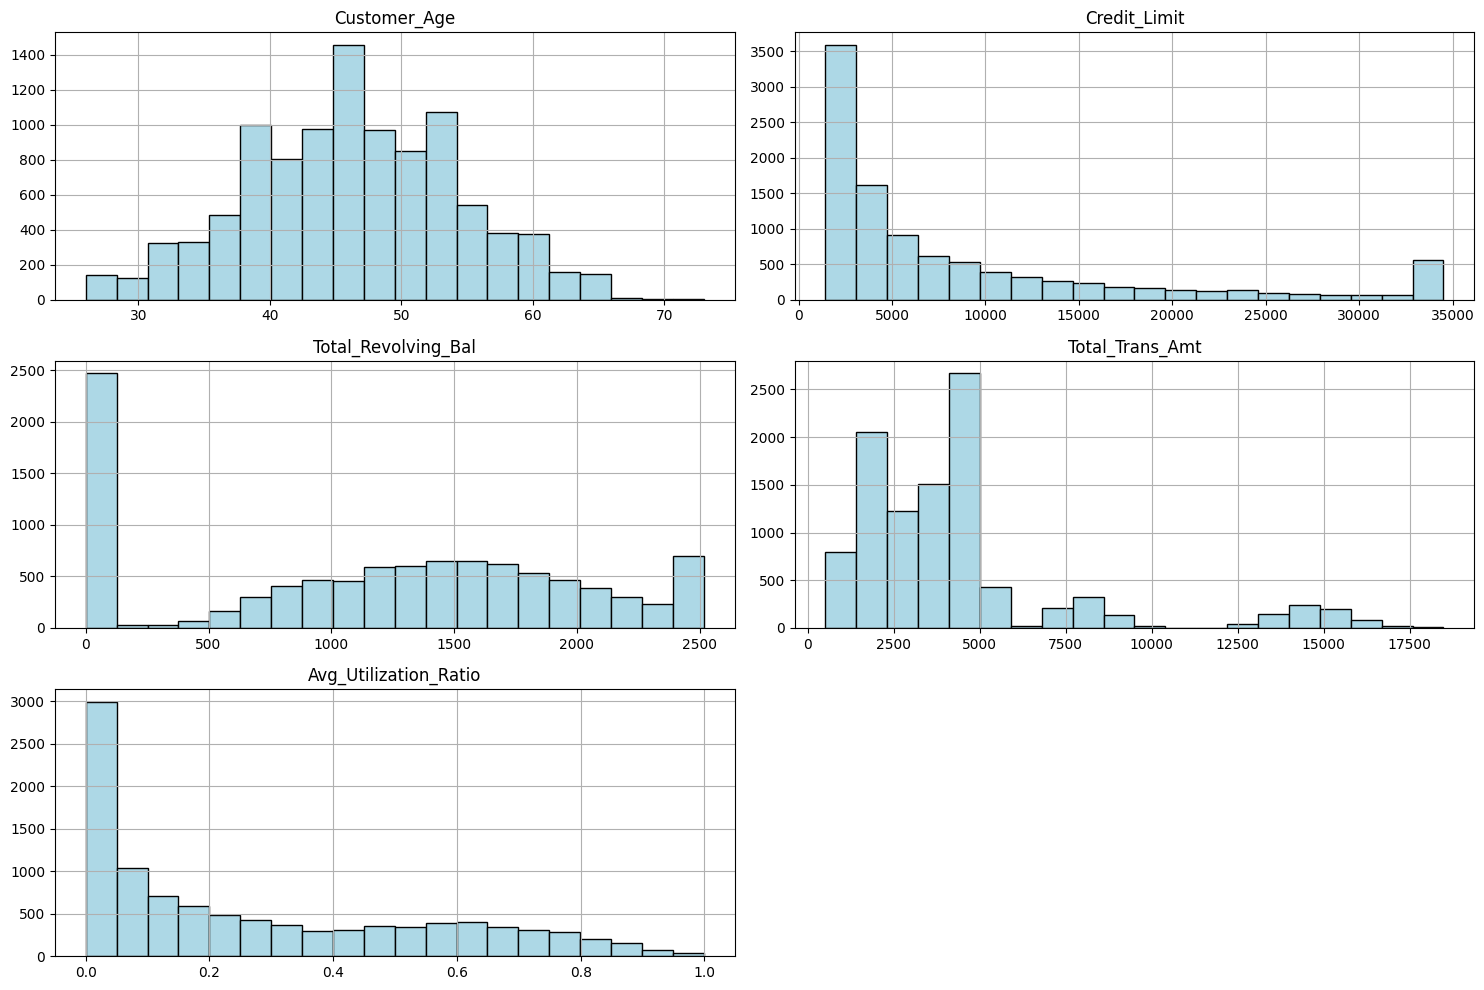

In [22]:
# Choose a few key numeric features
num_features = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

# Plot histograms
df[num_features].hist(bins=20, figsize=(15, 10), color='lightblue', edgecolor='black')
plt.tight_layout()
plt.show()


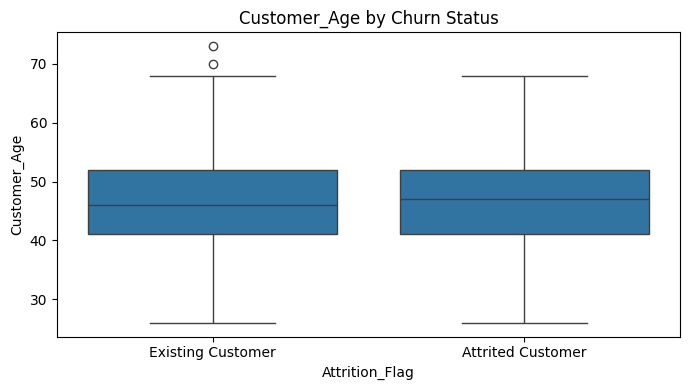

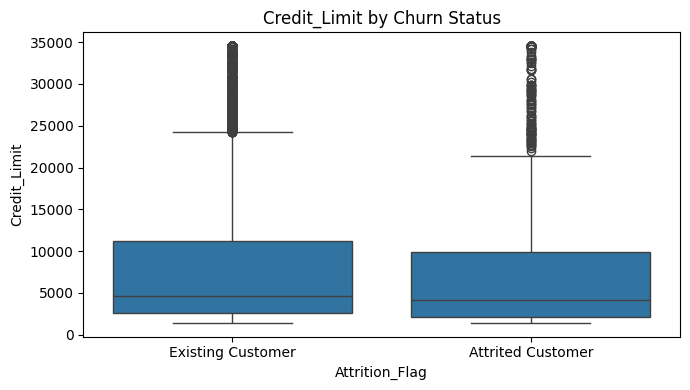

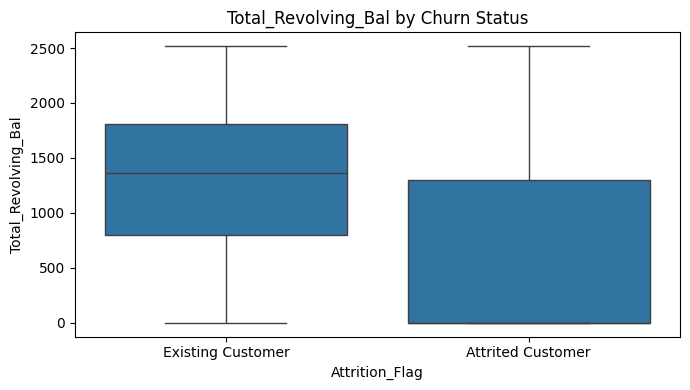

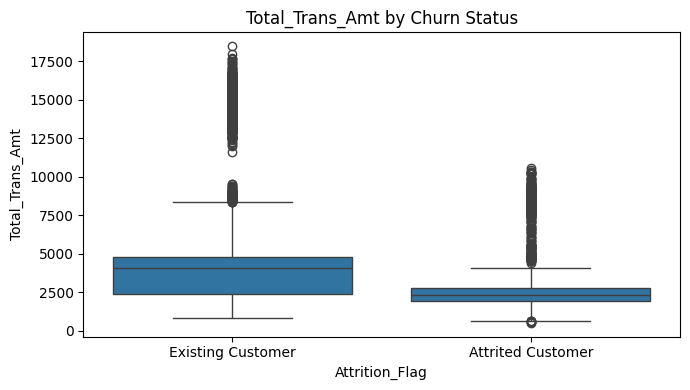

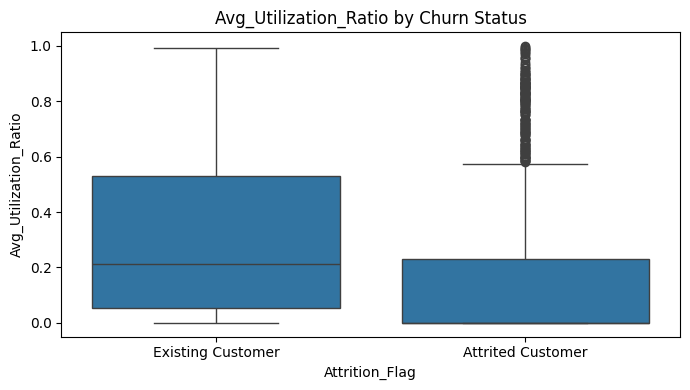

In [23]:
# Boxplots to compare distributions by churn status
for feature in num_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x='Attrition_Flag', y=feature)
    plt.title(f'{feature} by Churn Status')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


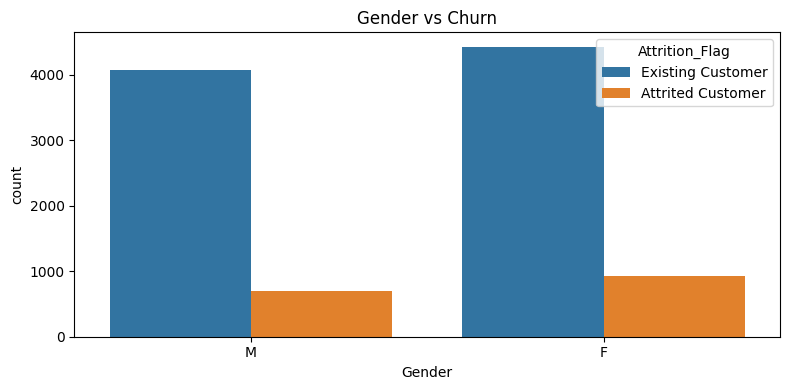

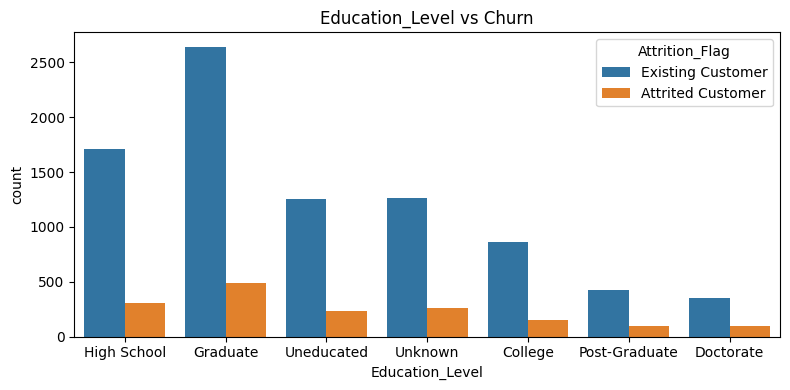

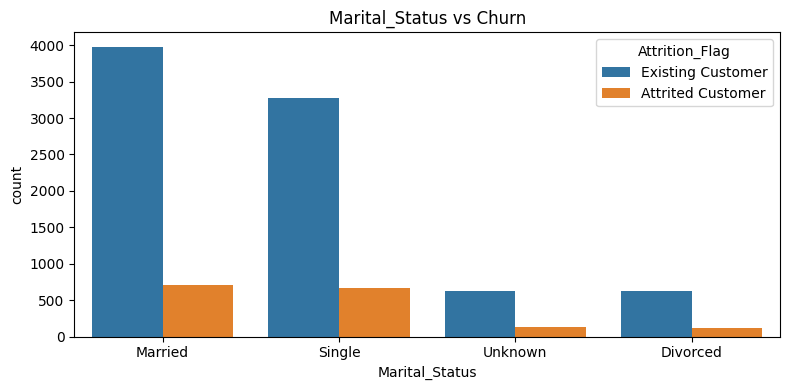

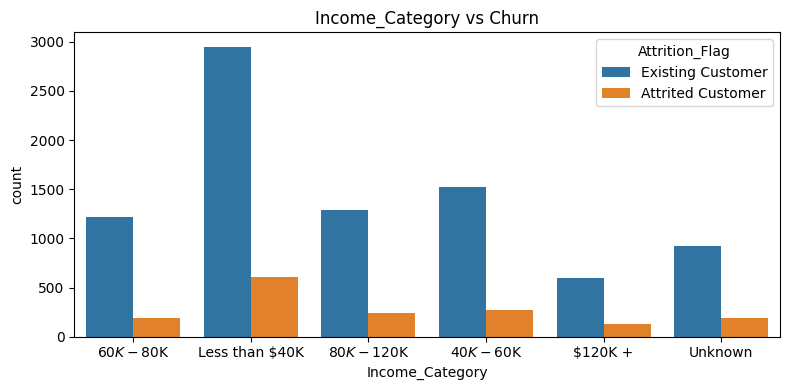

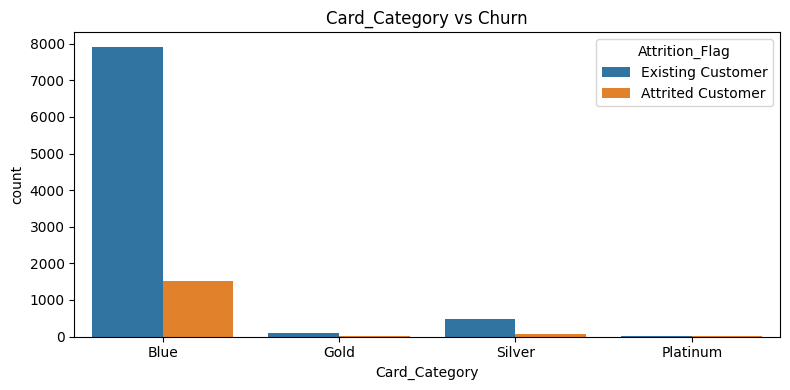

In [24]:
cat_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='Attrition_Flag')
    plt.title(f'{feature} vs Churn')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


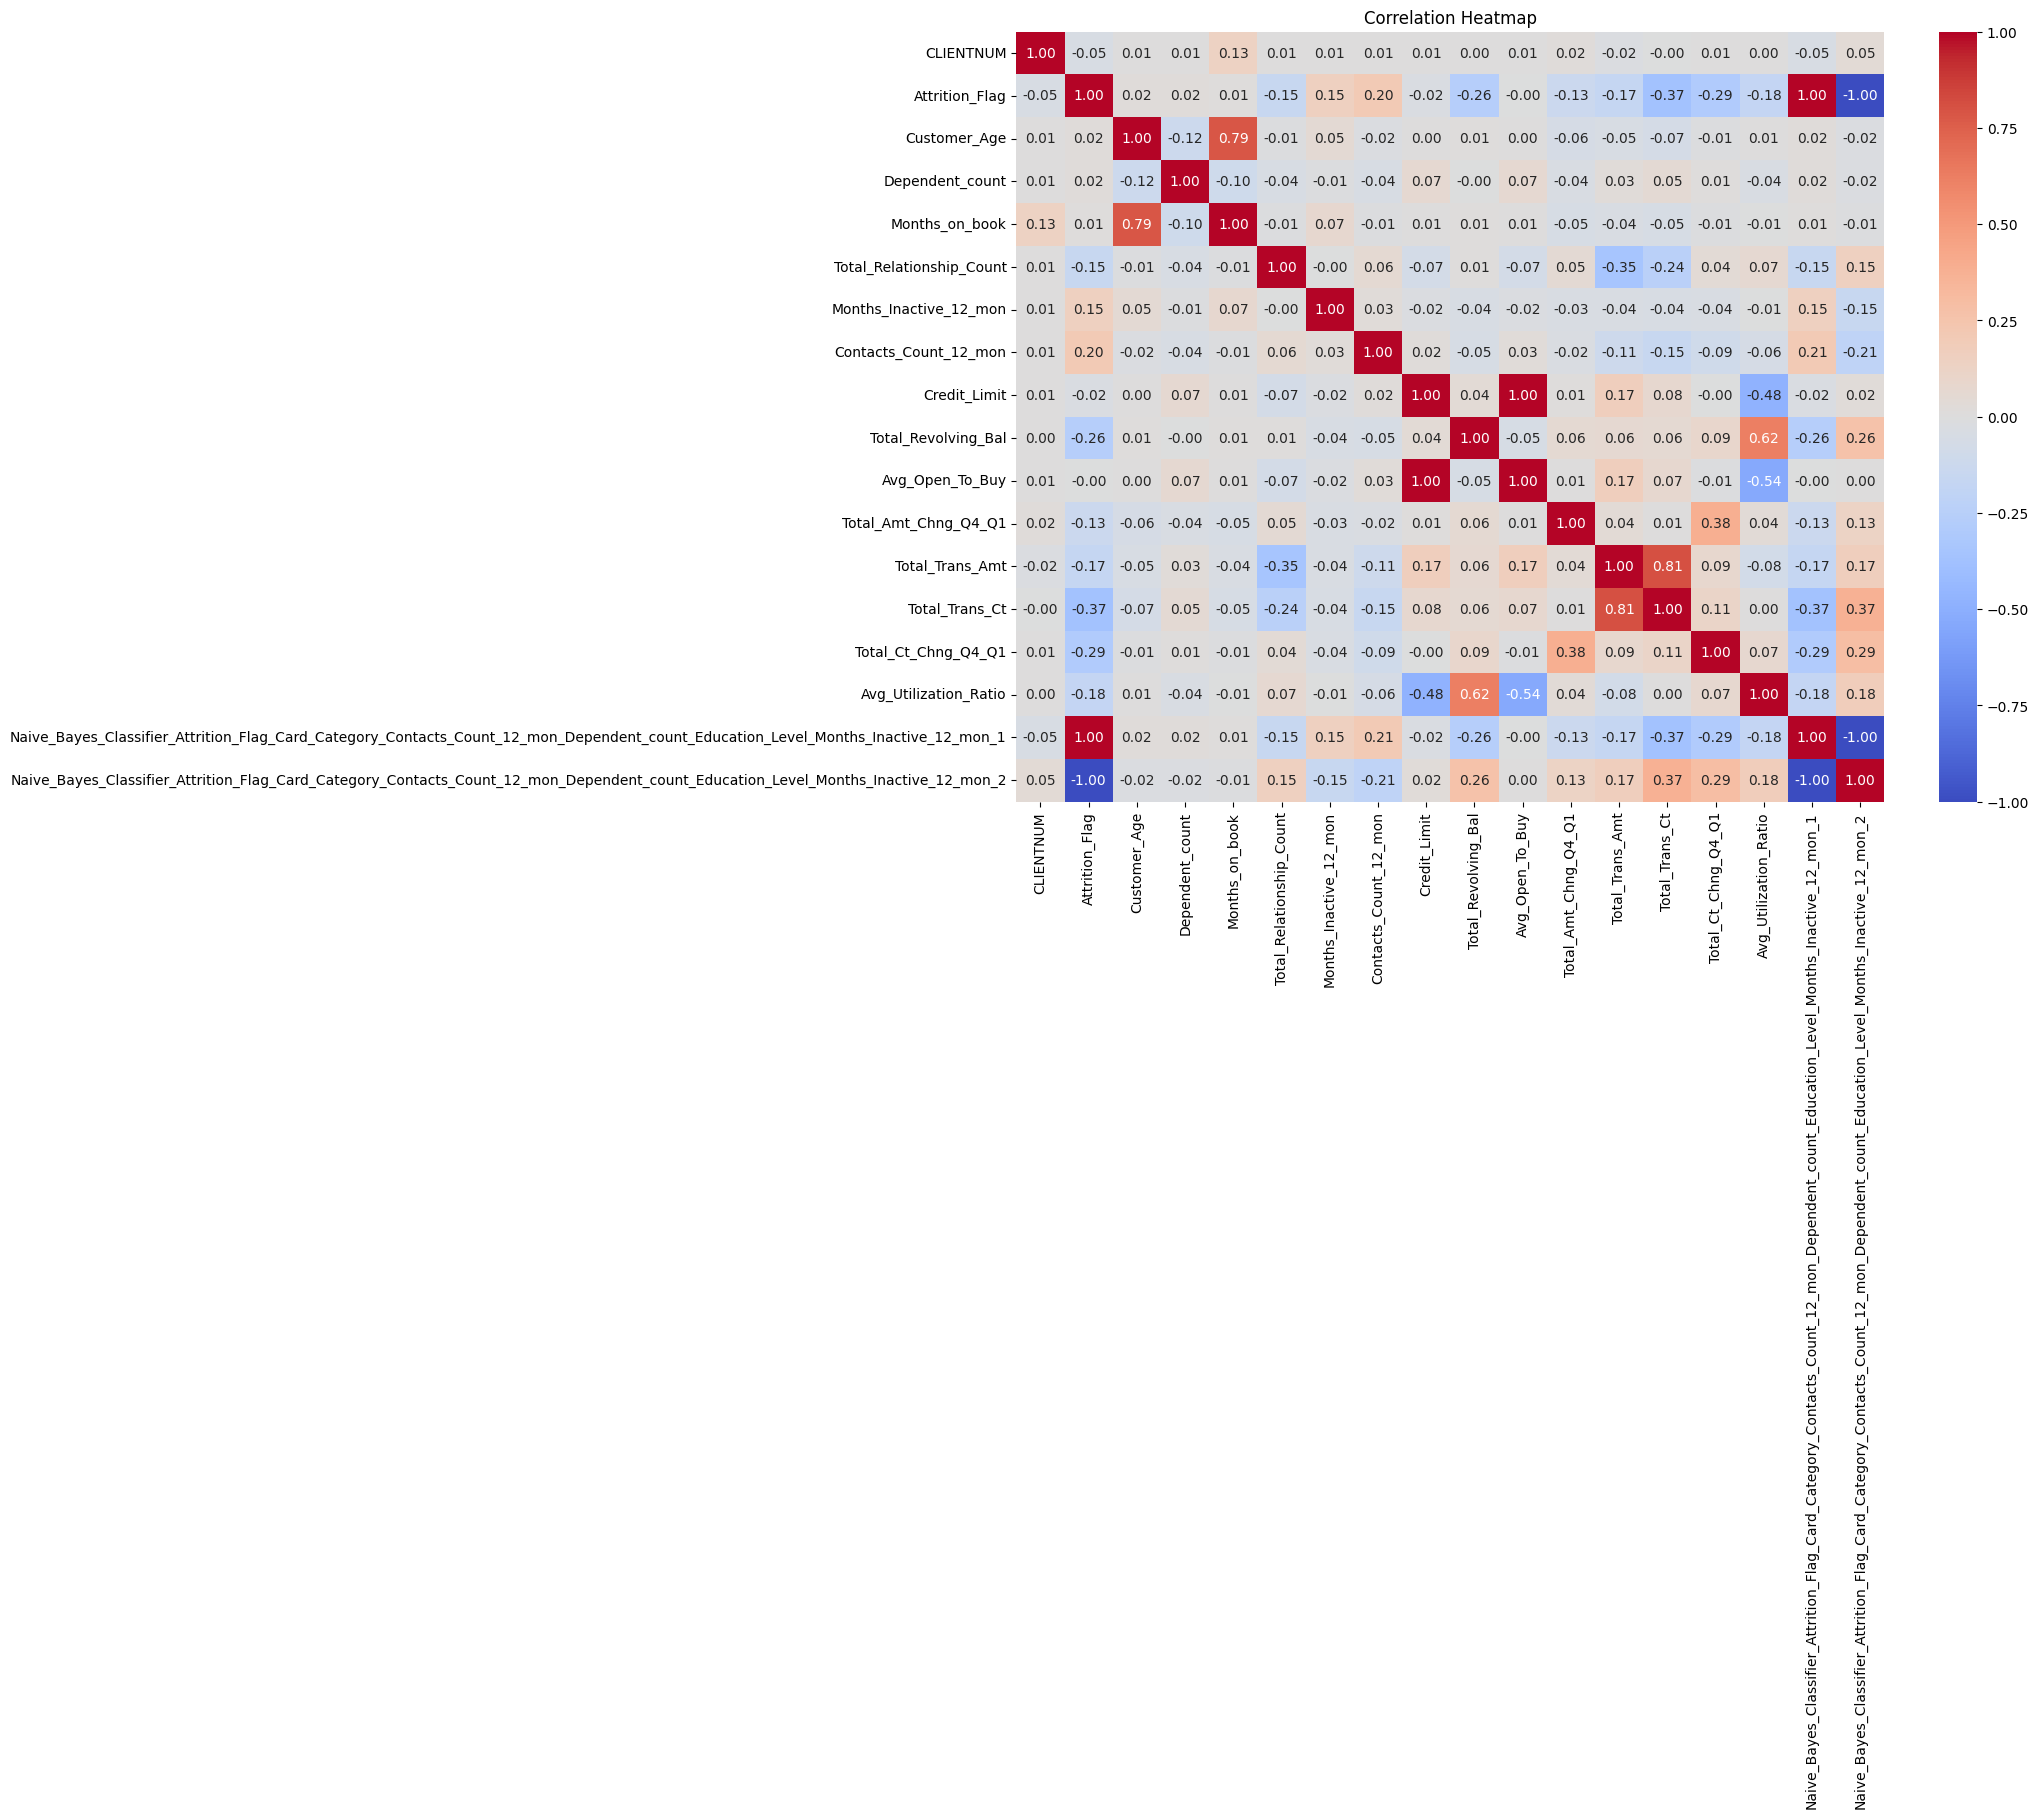

In [25]:
# Encode Attrition_Flag for correlation analysis
df_corr = df.copy()
df_corr['Attrition_Flag'] = df_corr['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Select numeric columns
corr = df_corr.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


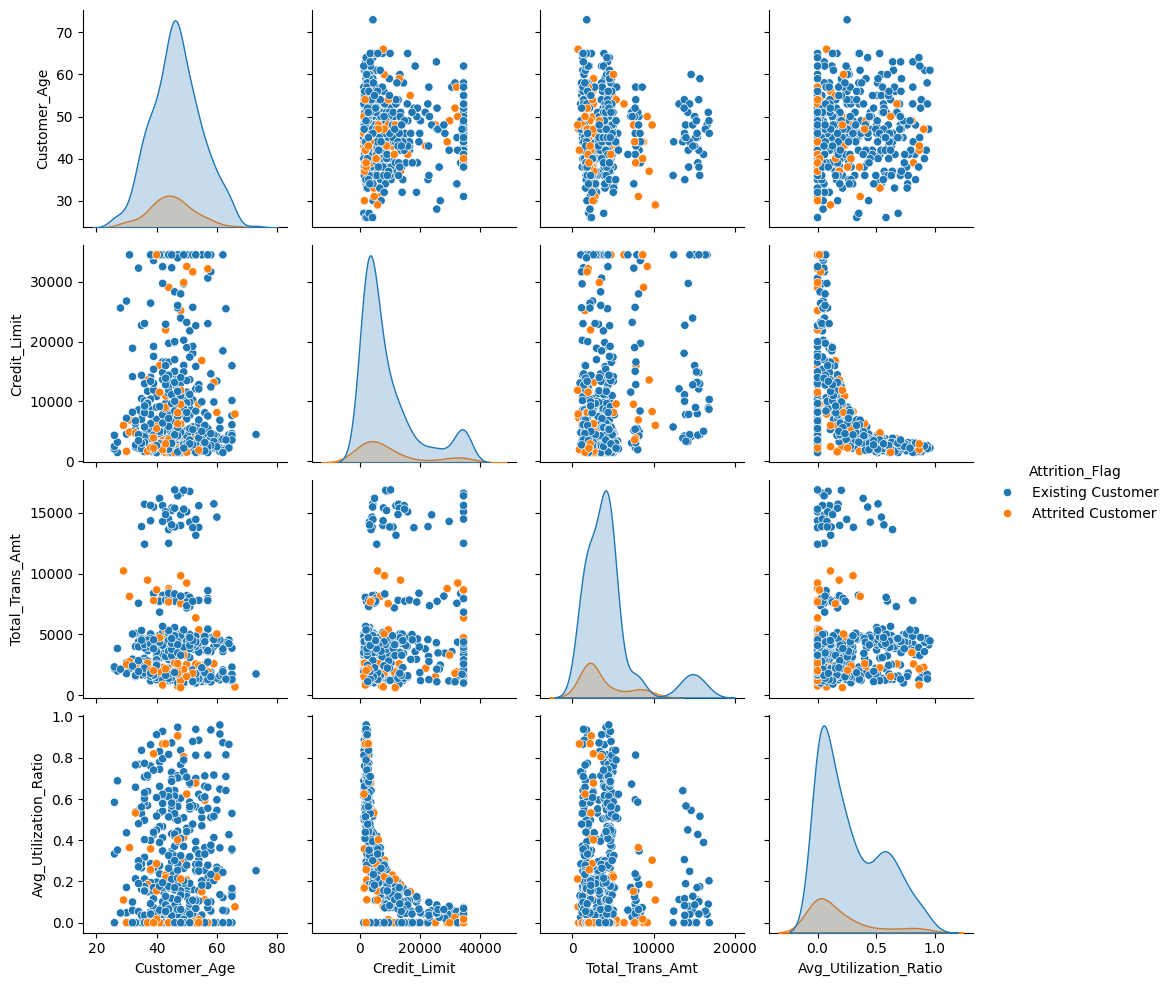

In [26]:
# Select small subset to avoid long processing
sampled_df = df.sample(500, random_state=42)

# Pairplot for selected features
sns.pairplot(sampled_df, hue='Attrition_Flag', vars=['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio'])
plt.show()


<Figure size 1500x1000 with 0 Axes>

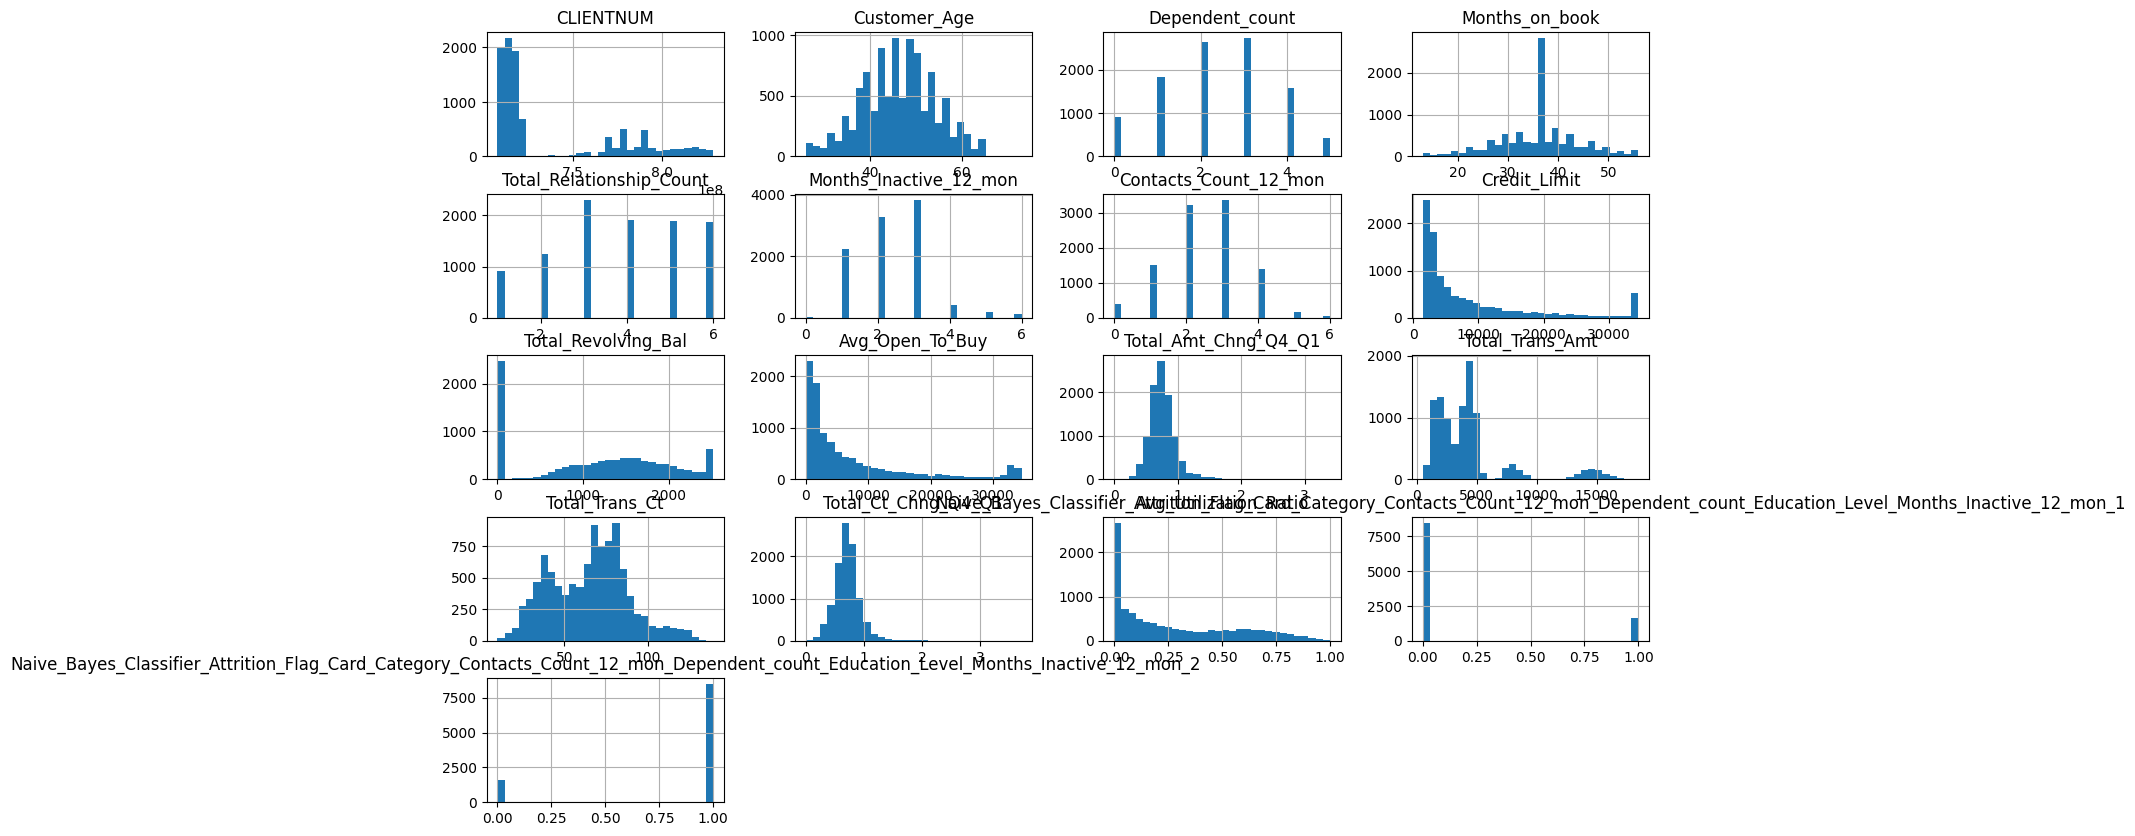

In [27]:
# Analyze numeric variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
df[numeric_cols].hist(bins=30, figsize=(15, 10))
# plt.tight_layout()
plt.savefig('visualizations/numeric_distributions.png')
plt.show()

## 3. Data Preprocessing

In [28]:
# Handle categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    if col != 'Attrition_Flag':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Create target variable
df['target'] = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)

# Drop unnecessary columns
columns_to_drop = ['Attrition_Flag', 'CLIENTNUM']
df = df.drop(columns=columns_to_drop)

## 4. Feature Engineering

In [29]:
# Create derived features
df['Credit_Utilization_Ratio'] = df['Total_Trans_Amt'] / df['Credit_Limit']
df['Average_Transaction'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

# Handle infinite values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)

print("New features created:")
print(df[['Credit_Utilization_Ratio', 'Average_Transaction']].describe())

New features created:
       Credit_Utilization_Ratio  Average_Transaction
count              10127.000000         10127.000000
mean                   1.041935            62.612717
std                    0.937981            26.404198
min                    0.018105            19.137931
25%                    0.303473            47.514573
50%                    0.727143            55.794872
75%                    1.553307            65.476673
max                    5.080247           190.193182


## 5. Model Training and Evaluation

Epoch 1/30


c:\Users\KIIT0001\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8588 - loss: 0.3752 - val_accuracy: 0.9056 - val_loss: 0.2342
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9059 - loss: 0.2417 - val_accuracy: 0.9161 - val_loss: 0.2037
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9079 - loss: 0.2253 - val_accuracy: 0.9266 - val_loss: 0.1878
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9163 - loss: 0.2083 - val_accuracy: 0.9204 - val_loss: 0.1823
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9308 - loss: 0.1873 - val_accuracy: 0.9266 - val_loss: 0.1741
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9294 - loss: 0.1874 - val_accuracy: 0.9340 - val_loss: 0.1696
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9181 - loss: 0.1932 - val_accuracy: 0.9297 - val_loss: 0.1676
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9303 - loss: 0.1725 - val_accuracy: 0.9278 - val_

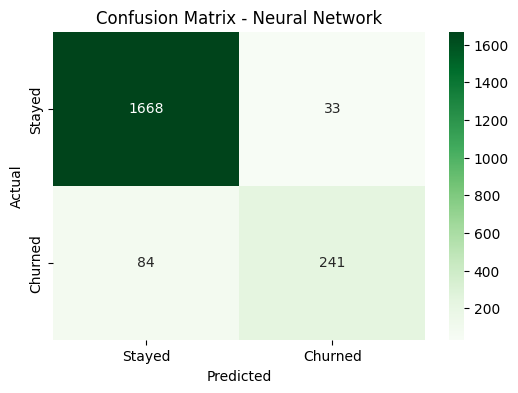

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Drop Naive Bayes columns if they exist
df = df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1, errors='ignore')


# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

# Predict on test data
y_pred_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()


In [31]:
# Print model performance
print("Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Performance:
Accuracy: 0.9422507403751234

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1701
           1       0.88      0.74      0.80       325

    accuracy                           0.94      2026
   macro avg       0.92      0.86      0.89      2026
weighted avg       0.94      0.94      0.94      2026



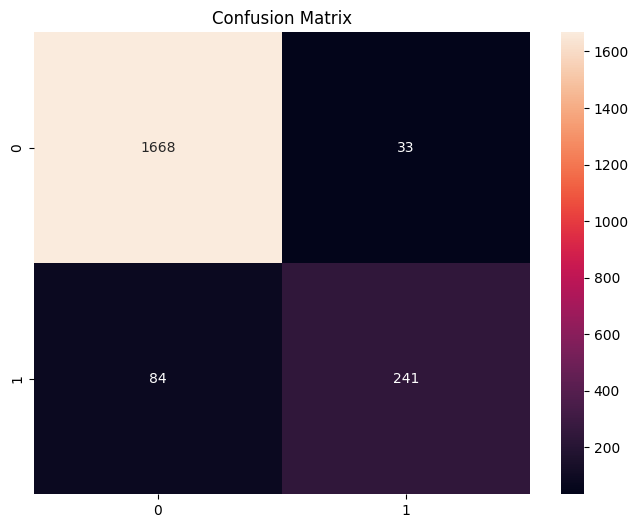

In [32]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.savefig('visualizations/confusion_matrix.png')
plt.show()

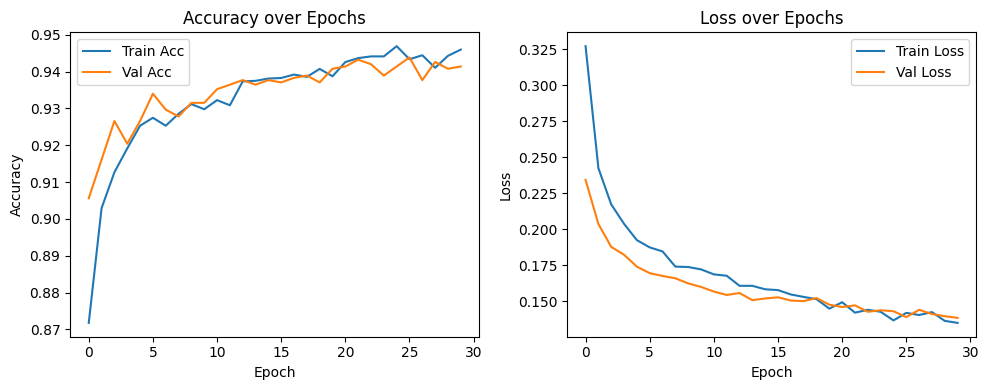

In [33]:
# Plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.savefig('visualizations/feature_importance.png')
plt.show()

AttributeError: 'Sequential' object has no attribute 'feature_importances_'

In [35]:
processed_data = df.copy()
label_encoders = {}

In [36]:
# Credit utilization ratio
processed_data['Credit_Utilization_Ratio'] = processed_data['Total_Trans_Amt'] / processed_data['Credit_Limit']
processed_data['Average_Transaction'] = processed_data['Total_Trans_Amt'] / processed_data['Total_Trans_Ct']


In [37]:
processed_data['Contact_Rate'] = processed_data['Contacts_Count_12_mon'] / 12
processed_data['Inactive_Ratio'] = processed_data['Months_Inactive_12_mon'] / 12
processed_data['Inactivity_Risk'] = pd.cut(
    processed_data['Months_Inactive_12_mon'], 
    bins=[0, 1, 3, 6, 12], 
    labels=['Low', 'Medium', 'High', 'Very High']
)


In [38]:
processed_data['Value_Segment'] = processed_data['Total_Relationship_Count'] * processed_data['Income_Category']
processed_data['Spending_Behavior_Change'] = processed_data['Total_Amt_Chng_Q4_Q1'] - processed_data['Total_Ct_Chng_Q4_Q1']
processed_data['Unusual_Spending'] = ((processed_data['Total_Amt_Chng_Q4_Q1'] > 2) | 
                                      (processed_data['Total_Amt_Chng_Q4_Q1'] < 0.5)).astype(int)


In [39]:
processed_data['Age_Group'] = pd.cut(
    processed_data['Customer_Age'], 
    bins=[0, 30, 40, 50, 60, 100], 
    labels=['Young', 'Thirties', 'Forties', 'Fifties', 'Senior']
)

processed_data['Revolving_Balance_Ratio'] = processed_data['Total_Revolving_Bal'] / processed_data['Credit_Limit']
processed_data['Zero_Balance_Flag'] = (processed_data['Total_Revolving_Bal'] == 0).astype(int)
processed_data['Dependents_Per_Age'] = processed_data['Dependent_count'] / processed_data['Customer_Age']


In [40]:
processed_data['Education_Income_Interaction'] = processed_data['Education_Level'] * processed_data['Income_Category']
processed_data = processed_data.replace([np.inf, -np.inf], np.nan)

# Fill missing numeric values with median
numeric_cols = processed_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    processed_data[col] = processed_data[col].fillna(processed_data[col].median())


In [41]:
categorical_cols = processed_data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    processed_data[col] = le.fit_transform(processed_data[col])
    label_encoders[col] = le


In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures


numerical_features = ['Customer_Age', 'Total_Relationship_Count', 'Months_on_book']
poly_features = processed_data[numerical_features].copy()

poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_transformed = poly.fit_transform(poly_features)
feature_names = poly.get_feature_names_out(numerical_features)
poly_df = pd.DataFrame(poly_transformed, columns=feature_names)

interaction_features = [col for col in poly_df.columns if ' ' in col]
processed_data = pd.concat([processed_data, poly_df[interaction_features]], axis=1)


In [43]:
processed_data['Recency_Score'] = 12 - processed_data['Months_Inactive_12_mon']
processed_data['Frequency_Score'] = processed_data['Total_Trans_Ct']
processed_data['Monetary_Score'] = processed_data['Total_Trans_Amt']

processed_data['RFM_Score'] = (
    processed_data['Recency_Score'] / processed_data['Recency_Score'].max() +
    processed_data['Frequency_Score'] / processed_data['Frequency_Score'].max() +
    processed_data['Monetary_Score'] / processed_data['Monetary_Score'].max()
) / 3


In [44]:
for col in ['Total_Trans_Amt', 'Credit_Limit', 'Avg_Open_To_Buy']:
    if col in processed_data.columns:
        processed_data[f'{col}_Log'] = np.log1p(processed_data[col])


In [45]:
processed_data['Tenure_Ratio'] = processed_data['Months_on_book'] / (processed_data['Customer_Age'] * 12)


In [60]:
from sklearn.cluster import KMeans


cluster_features = ['Customer_Age', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Total_Trans_Ct']
cluster_data = processed_data[cluster_features].copy()

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=5, random_state=42)
processed_data['Customer_Segment'] = kmeans.fit_predict(cluster_data_scaled)


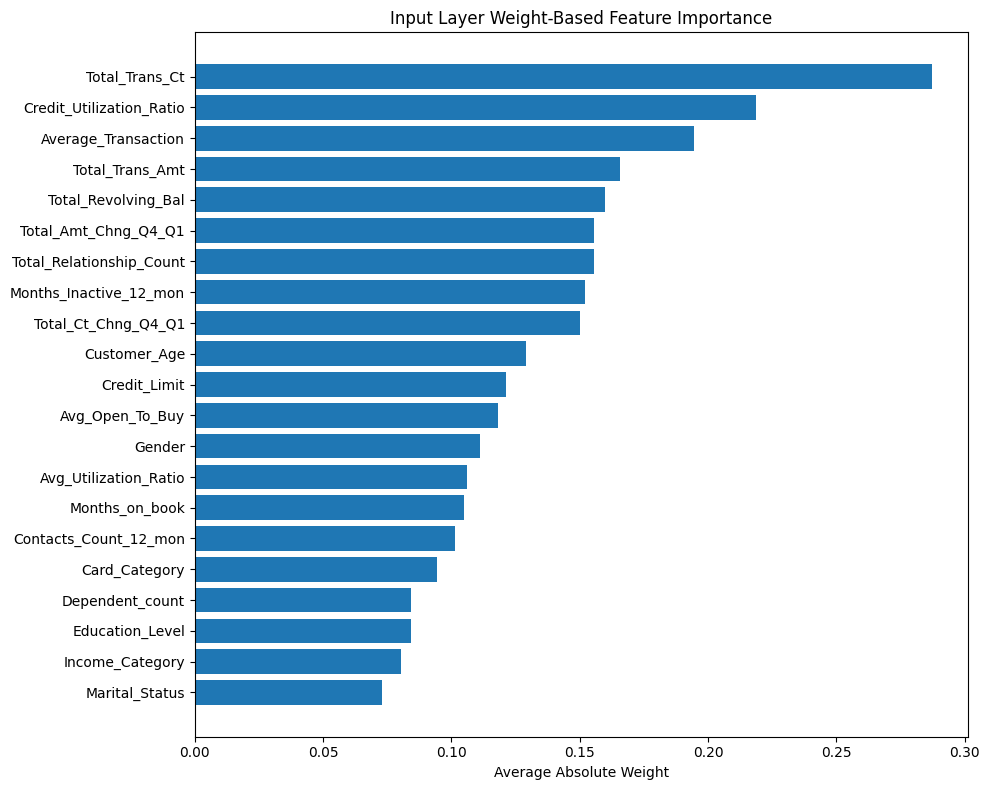

In [61]:
# Get weights from the input layer
input_weights = model.layers[0].get_weights()[0]  # Shape: (num_features, num_neurons)
feature_importance = np.mean(np.abs(input_weights), axis=1)  # Aggregate across neurons

# Plot
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Average Absolute Weight")
plt.title("Input Layer Weight-Based Feature Importance")
plt.tight_layout()
plt.show()
